# HW3

## Decision Trees

### Team members

## AARTI DASHORE






### Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. Let's check that Python 3.5 or later is installed, as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Part 0

- Run and check the outputs.

### Confusion matrix plot

In [2]:
# Show confusion matrix
def plot_confusion_matrix(confusion_mat, cln):
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(cln)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### Confusion matrix simple example 1

[[2 1 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [0 1 0 2]]


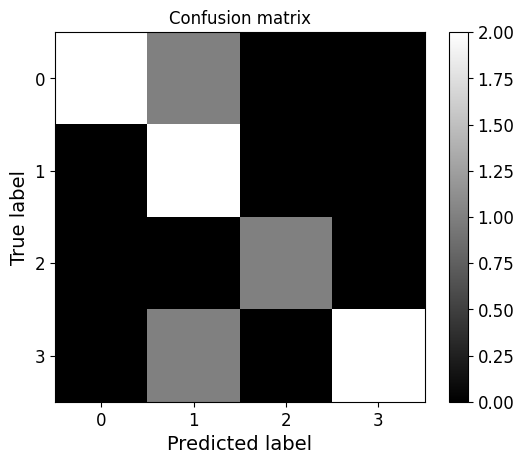

In [3]:
y_true = [1, 0, 0, 2, 1, 0, 3, 3, 3]
y_pred = [1, 1, 0, 2, 1, 0, 1, 3, 3]
confusion_mat = confusion_matrix(y_true, y_pred)

print(confusion_mat)
plot_confusion_matrix(confusion_mat, 4)

In [4]:
# Print classification report
target_names = ['Class-0', 'Class-1', 'Class-2', 'Class-3']

result_metrics = classification_report(y_true, y_pred, target_names=target_names)

print(result_metrics)

              precision    recall  f1-score   support

     Class-0       1.00      0.67      0.80         3
     Class-1       0.50      1.00      0.67         2
     Class-2       1.00      1.00      1.00         1
     Class-3       1.00      0.67      0.80         3

    accuracy                           0.78         9
   macro avg       0.88      0.83      0.82         9
weighted avg       0.89      0.78      0.79         9



### Confusion matrix simple example 2

[[2 2]
 [0 5]]


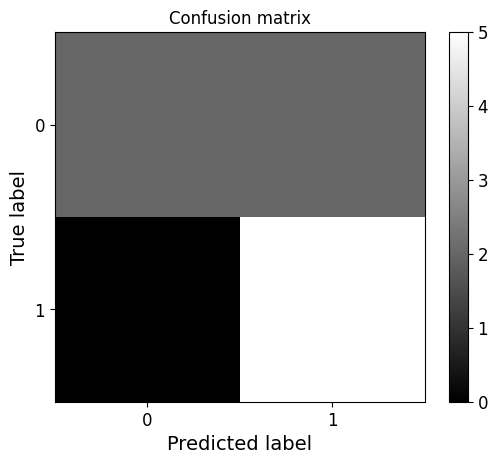

In [5]:
y_true2 = [1, 0, 0, 1, 1, 0, 1, 1, 0]
y_pred2 = [1, 1, 0, 1, 1, 0, 1, 1, 1]
confusion_mat2 = confusion_matrix(y_true2, y_pred2)

print(confusion_mat2)
plot_confusion_matrix(confusion_mat2, 2)

In [6]:
# Print classification report
target_names2 = ['Class-0', 'Class-1']

result_metrics = classification_report(y_true2, y_pred2, target_names=target_names2)

print(result_metrics)

              precision    recall  f1-score   support

     Class-0       1.00      0.50      0.67         4
     Class-1       0.71      1.00      0.83         5

    accuracy                           0.78         9
   macro avg       0.86      0.75      0.75         9
weighted avg       0.84      0.78      0.76         9



## Data Visualization

### iris dataset before we start training and testing a model
#### use pandas  pd.plotting.scatter_matrix

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Ir

<ipython-input-9-446925bcffe0>:19: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  _ = pd.plotting.scatter_matrix(iris_df[[c for c in iris_df.columns if c != 'y']], ax=ax)


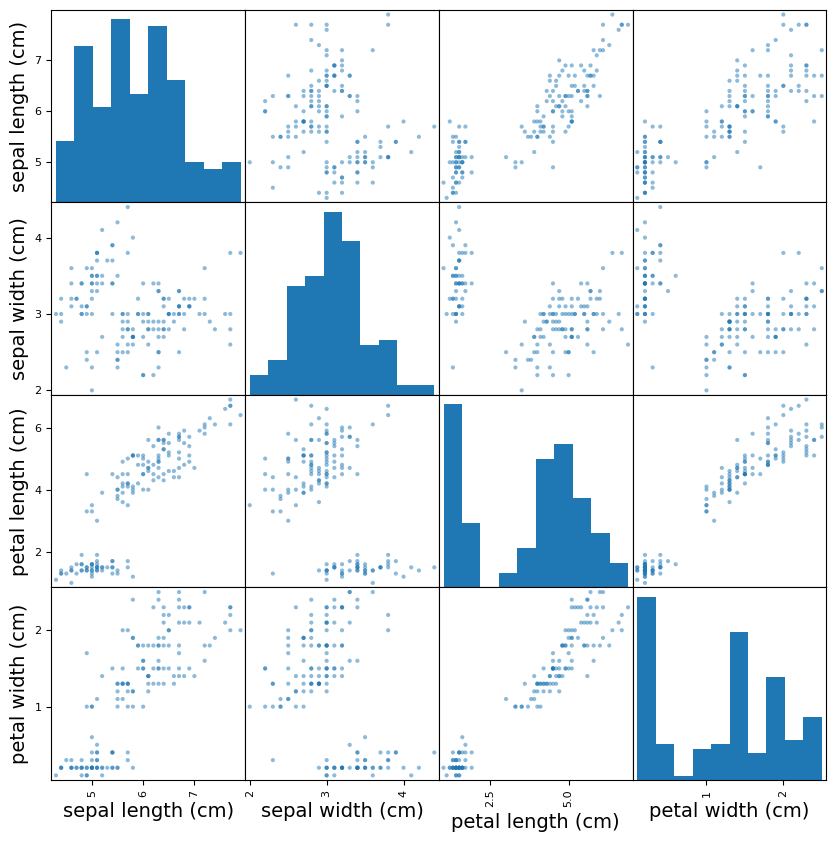

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# read data from CSV file to dataframe
iris = pd.read_csv('Iris.csv')
print(iris.head())
print(iris.tail())
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
# Load some data
iris = datasets.load_iris()
print(iris['feature_names'])
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

# scatter matrix plot
fig, ax = plt.subplots(figsize=(10,10), dpi=100)

_ = pd.plotting.scatter_matrix(iris_df[[c for c in iris_df.columns if c != 'y']], ax=ax)
_ = ax.set_title('Scatter matrix')
plt.show()



# Decision Trees

### Load data

- For the following code, we use sklearn.datasets package for loading a dataset instead of reading a data file stored on a local machine.

In [10]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
#print(iris)

### Split the data to training and testing

In [11]:
X = iris.data[:, 2:] # petal length and width
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Training
### Learing using training data

- use Gini index measure

*** Notes: you can also use gain information (entropy) measure by setting criterion="entropy" in the model

In [12]:
tree_clf = DecisionTreeClassifier(max_depth=2, criterion="gini", random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

## Testing
### Evaluating the model using testing data

In [13]:
y_pred = tree_clf.predict(X_test)

# Visualization

## Confusion matrix

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


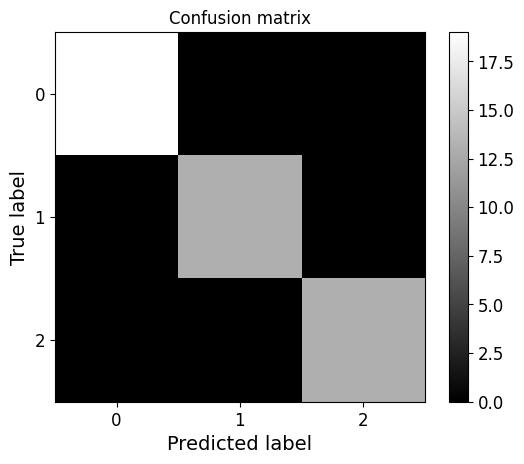

In [14]:
# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

plot_confusion_matrix(confusion_mat, 3)

### Model performance summary

In [15]:
# Print classification report
target_names = iris.target_names

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [16]:
# you can access each class's metrics from result_metrics
result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

print(result_metrics_dict['setosa']['precision'])

1.0


### Draw a decision tree
notice that using graphviz is not the only method to draw decision tree.  You can also use  sklearn.tree.plot_tree

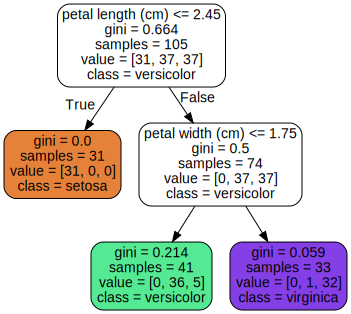

In [17]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

## k-Cross Validation

- using sklearn corss_val_score() function

In [18]:
from sklearn.model_selection import cross_val_score

cross_val_score(tree_clf, iris.data, iris.target, cv=3)

array([0.96, 0.92, 0.92])

## k-Cross Validation

- using KFold function with freedom

In [ ]:
from sklearn.model_selection import KFold # import k-fold validation

kf = KFold(n_splits=3, random_state=None, shuffle=True) # Define the split - into 2 folds

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf)


KFold(n_splits=3, random_state=None, shuffle=True)


### Applying k-Cross Validation

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf.fit(X_train, y_train)

    y_pred = tree_clf.predict(X_test)

    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        21
  versicolor       1.00      0.92      0.96        12
   virginica       0.94      1.00      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.87      1.00      0.93        20
   virginica       1.00      0.79      0.88        14

    accuracy                           0.94        50
   macro avg       0.96      0.93      0.94        50
weighted avg       0.95      0.94      0.94        50

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.89      0.94      0.92        18
   virginica       0.94      0.89      0.92        19

    accuracy        

# Decision Tree boundary Visualization

In [ ]:
## Example  This function is meant to be used for other data besides iris.

Saving figure decision_tree_decision_boundaries_plot


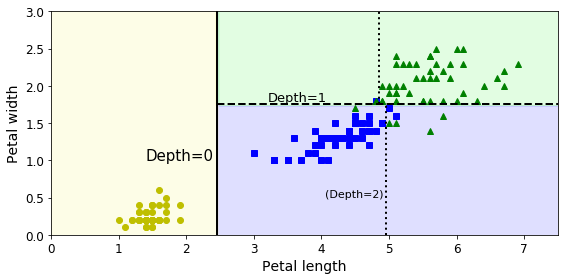

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)       # Return evenly spaced numbers over a specified interval.
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

# Predicting classes and class probabilities

In [ ]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.91428571, 0.08571429]])

In [ ]:
tree_clf.predict([[5, 1.5]])

array([1])

# Sensitivity to training set details

In [ ]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris versicolor flower


array([[4.8, 1.8]])

In [ ]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

Saving figure decision_tree_instability_plot


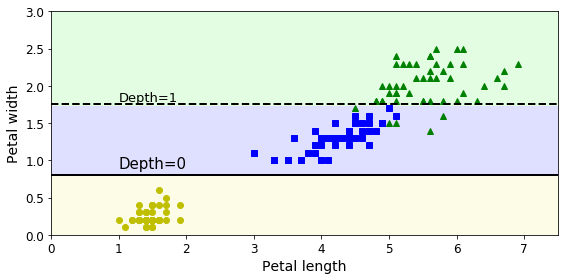

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

# =========  HW3 =============

##  ===============================

## Construct decision trees

#### 1. Construct  a decision tree using the following parameters

- Use information gain (entropy) measure
- Apply k=10 cross validation and print a summary of statistics (performance evaluation) for each fold


#### 2. Compare the performance results with those of the decision tree using Gini index measure in the above example

#### 3. For both trees, change the following parameters and observe the changes:

- The depth of tree: currently max_depth=2 in the model training step. Change the depth 3, 4, 5 and check if this affects the overall results.

- The k value for cross validation is currently set to 3. Change k value, k = 5, 7, 10 and check if this affects the overall results.

In [23]:
# Import the data, classifier, and metrics libraries similar to what we did above
import sys
assert sys.version_info >= (3, 5)
import sklearn
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
assert sklearn.__version__ >= "0.20"
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from graphviz import Source
from sklearn.tree import export_graphviz

# load iris dataset and confirm data has been loaded by printing first few lines
iris = load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [24]:
# Split data into testing and training - same as code above
X = iris.data[:, 2:] # petal length and width
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


In [25]:
# Create decision tree and set criterion to information gain (entropy)
dtree_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy", random_state=42)
dtree_clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

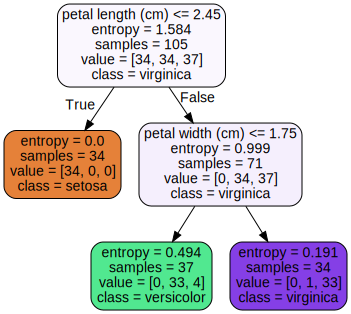

In [26]:
# Visualize the new tree that you constructed  using graphviz
y_pred = dtree_clf.predict(X_test)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

export_graphviz(
        dtree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

In [27]:
# Apply 10-fold cross validation score
scores = cross_val_score(dtree_clf, X, y, cv=10)
print("Entropy Decision Tree: Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))
print("Standard deviation:", np.std(scores))

Entropy Decision Tree: Cross-validation scores: [1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.86666667 1.         1.         1.        ]
Mean accuracy: 0.9533333333333334
Standard deviation: 0.052068331172711015


In [28]:
# Parse and bin the data into   10 folds for validation
  # import k-fold validation
from sklearn.model_selection import KFold

  # Define the split - into 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)
for fold, (train_index, test_index) in enumerate(kf.split(X), start=1): # Split the data and show how the data is divided into 10 folds
    print(f"Fold {fold}:")
    print("Train indices:", train_index)
    print("Test indices:", test_index)

  # returns the number of splitting iterations in the cross-validator
print("Number of splitting iterations (folds):", kf.get_n_splits())

Fold 1:
Train indices: [  0   1   2   3   4   5   6   7   8  10  11  13  14  15  16  17  20  21
  22  23  24  25  26  27  28  29  30  32  33  34  35  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  65  66  67  69  70  71  72  74  75  77  79  80  81  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 111 112 113 114 115 116 117 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 142 143 144 145 146 147 148 149]
Test indices: [  9  12  18  19  31  36  64  68  73  76  78  82 110 118 141]
Fold 2:
Train indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  27  28  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  46  47  48  49  50  51  52  53  54  57  58  59
  60  61  62  63  64  65  66  67  68  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87 

In [29]:
# Apply the 10-fold cross validation we've created

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)  # Define the classifier (Decision Tree with entropy criterion)
cv_scores = []  # List to store accuracy scores for each fold

for train_index, test_index in kf.split(X):   # Loop through the folds and apply the 10-fold cross-validation
    X_train, X_test = X[train_index], X[test_index] # Split the data into training and testing sets based on the fold indices
    y_train, y_test = y[train_index], y[test_index]

    dtree_clf.fit(X_train, y_train) # Train the classifier on the training data
    y_pred = dtree_clf.predict(X_test)  # Make predictions on the test data
    accuracy = accuracy_score(y_test, y_pred) # Calculate the accuracy of the model for the current fold
    cv_scores.append(accuracy)  # Append the accuracy score to the list

print("Cross-validation scores for each fold:", cv_scores)  # Print the accuracy scores for each fold
print("Average cross-validation score:", sum(cv_scores) / len(cv_scores)) # Print the average accuracy score across all folds
print("Number of splitting iterations (folds):", kf.get_n_splits()) # Print the number of splitting iterations (i.e., the number of folds)

Cross-validation scores for each fold: [1.0, 1.0, 1.0, 1.0, 0.9333333333333333, 0.8666666666666667, 0.8666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333]
Average cross-validation score: 0.9466666666666669
Number of splitting iterations (folds): 10


<ipython-input-30-dfff797ef8d3>:11: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, edgecolor='k', cmap=plt.cm.coolwarm, marker='x', label="Test data") # Plot the testing points


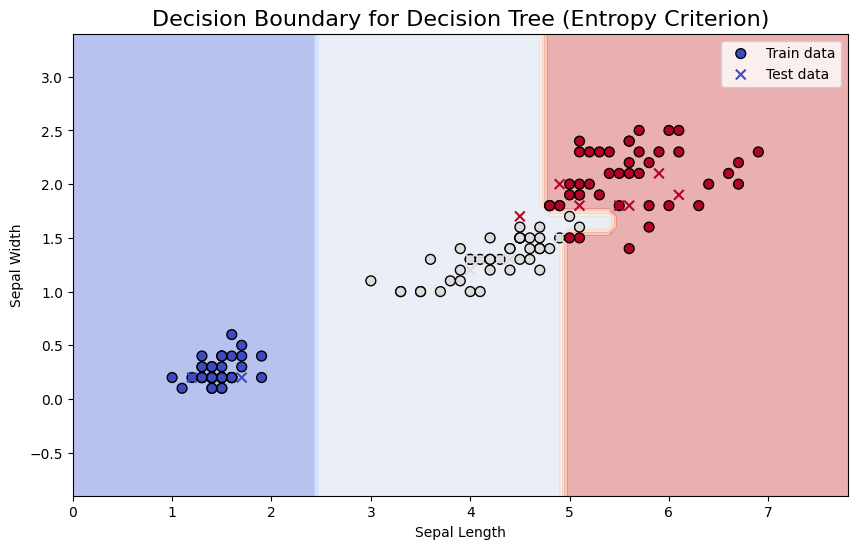

In [30]:
# Plot the decision boundry graph for the entropy model
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # Generate a grid of points covering the range of the features
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = dtree_clf.predict(np.c_[xx.ravel(), yy.ravel()])  # Predict the class for each point in the grid
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)  # Plot the decision boundary by filling the areas with the predicted class
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, edgecolor='k', cmap=plt.cm.coolwarm, marker='o', label="Train data") # Plot the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, edgecolor='k', cmap=plt.cm.coolwarm, marker='x', label="Test data") # Plot the testing points
plt.title("Decision Boundary for Decision Tree (Entropy Criterion)", fontsize=16)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

In [31]:
#explain what is the relationship between the drawn decision bondries and gini index

## **Decision Boundaries and the Criteria:**
* While both entropy and Gini index aim to achieve the same objective (i.e. creating pure nodes), they may influence the splitting process differently, which may lead to a slightly different decision boundaries.

* Usually, entropy tends to favor splits that create more balanced groups. In some cases, especially when there are multiple class divisions, entropy may create more evenly distributed decision regions. It looks for splits that maximizes the information gain, in a way that it minimizes uncertainty.

* On the other hand, Gini index, is often more biased towards larger classes and tends to make splits that are more straightforward, often creating simpler decision boundaries. It might also produce decision boundaries that are slightly more aggressive than those created by entropy, especially when classes are imbalanced.

* Both criterias generally lead to similar overall decision boundaries, especially on a well-behaved high-dimensional dataset like the Iris dataset. The choice between them often comes down to small differences in behavior, and the results are usually quite similar unless the data is highly imbalanced or complex.

<ipython-input-22-30ac02dac082>:28: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, edgecolor='k', cmap=plt.cm.coolwarm, marker='x', label="Test data")
<ipython-input-22-30ac02dac082>:38: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, edgecolor='k', cmap=plt.cm.coolwarm, marker='x', label="Test data")


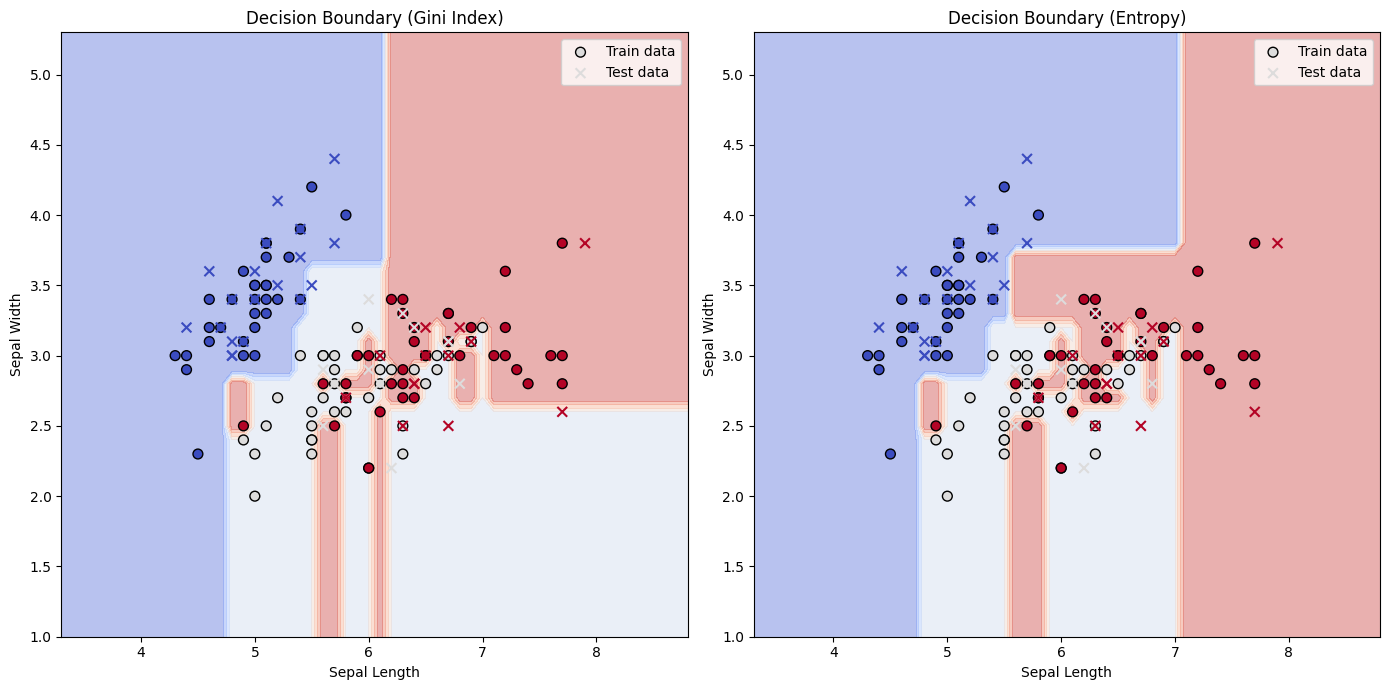

In [22]:
#For visualization, creating two DecisionTreeClassifiers: one with 'gini' and one with 'entropy'
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Training the classifiers
clf_gini.fit(X_train, y_train)
clf_entropy.fit(X_train, y_train)

# Generating a grid of points covering the range of the features
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predicting the class for each point in the grid using both classifiers
Z_gini = clf_gini.predict(np.c_[xx.ravel(), yy.ravel()])
Z_gini = Z_gini.reshape(xx.shape)

Z_entropy = clf_entropy.predict(np.c_[xx.ravel(), yy.ravel()])
Z_entropy = Z_entropy.reshape(xx.shape)

# Creating the plot
plt.figure(figsize=(14, 7))

# Ploting the decision boundary for Gini criterion
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_gini, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, edgecolor='k', cmap=plt.cm.coolwarm, marker='o', label="Train data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, edgecolor='k', cmap=plt.cm.coolwarm, marker='x', label="Test data")
plt.title("Decision Boundary (Gini Index)")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

# Ploting the decision boundary for Entropy criterion
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_entropy, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, edgecolor='k', cmap=plt.cm.coolwarm, marker='o', label="Train data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, edgecolor='k', cmap=plt.cm.coolwarm, marker='x', label="Test data")
plt.title("Decision Boundary (Entropy)")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

plt.tight_layout()
plt.show()


<ipython-input-32-4a53626daa0b>:28: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, edgecolor='k', cmap=plt.cm.coolwarm, marker='x', label="Test data")
<ipython-input-32-4a53626daa0b>:38: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, edgecolor='k', cmap=plt.cm.coolwarm, marker='x', label="Test data")
<ipython-input-32-4a53626daa0b>:28: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, edgecolor='k', 

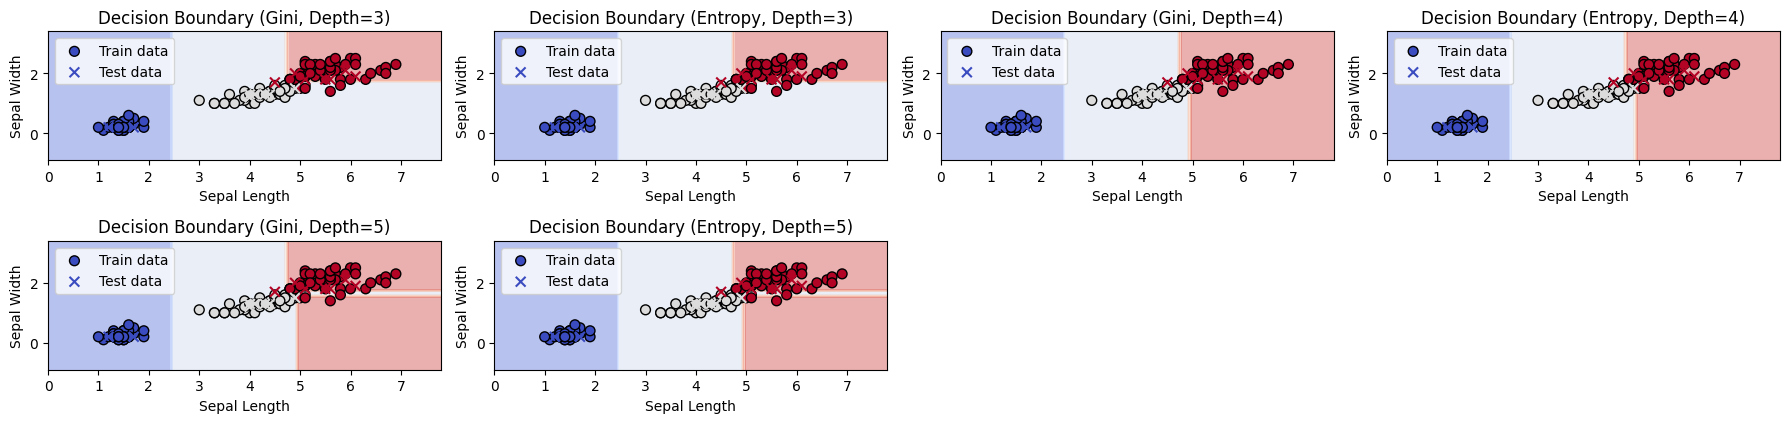

In [32]:
# Change the depth of the decision tree to 3, 4, and  5

depths = [3, 4, 5]  # Define the depths to evaluate
plt.figure(figsize=(18, 6))

for i, depth in enumerate(depths, start=1): # Loop through each depth and plot the decision boundary
    clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42) # Create the DecisionTreeClassifier for both 'gini' and 'entropy' with the current depth
    clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)

    clf_gini.fit(X_train, y_train)  # Train the classifiers
    clf_entropy.fit(X_train, y_train)


    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # Generate a grid of points covering the range of the features
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z_gini = clf_gini.predict(np.c_[xx.ravel(), yy.ravel()])  # Predict the class for each point in the grid using both classifiers
    Z_gini = Z_gini.reshape(xx.shape)

    Z_entropy = clf_entropy.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_entropy = Z_entropy.reshape(xx.shape)

    # Plot the decision boundary for Gini criterion
    plt.subplot(3, 4, (i - 1) * 2 + 1)
    plt.contourf(xx, yy, Z_gini, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, edgecolor='k', cmap=plt.cm.coolwarm, marker='o', label="Train data")
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, edgecolor='k', cmap=plt.cm.coolwarm, marker='x', label="Test data")
    plt.title(f"Decision Boundary (Gini, Depth={depth})")
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()

    # Plot the decision boundary for Entropy criterion
    plt.subplot(3, 4, (i - 1) * 2 + 2)
    plt.contourf(xx, yy, Z_entropy, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, edgecolor='k', cmap=plt.cm.coolwarm, marker='o', label="Train data")
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, edgecolor='k', cmap=plt.cm.coolwarm, marker='x', label="Test data")
    plt.title(f"Decision Boundary (Entropy, Depth={depth})")
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()

plt.tight_layout()
plt.show()



In [33]:
# Create the 5 fold cv
clf_entropy_depth3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Validate output on the tree with depth 3
entropy_depth3_scores = cross_val_score(clf_entropy_depth3, X, y, cv=5)  # 5-fold CV
print(f"5-Fold Cross-Validation Scores for Entropy (Depth 3): {entropy_depth3_scores}")
print(f"Mean Accuracy for Entropy (Depth 3): {entropy_depth3_scores.mean()}")


# Create the 7 fold cv
clf_entropy_depth4 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

# Validate output on the tree with depth 4
entropy_depth4_scores = cross_val_score(clf_entropy_depth4, X, y, cv=7)  # 7-fold CV
print(f"7-Fold Cross-Validation Scores for Entropy (Depth 4): {entropy_depth4_scores}")
print(f"Mean Accuracy for Entropy (Depth 4): {entropy_depth4_scores.mean()}")


# Create the 10 fold cv
clf_entropy_depth5 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

# Validate output on the tree with depth 5
entropy_depth5_scores = cross_val_score(clf_entropy_depth5, X, y, cv=10)  # 10-fold CV
print(f"10-Fold Cross-Validation Scores for Entropy (Depth 5): {entropy_depth5_scores}")
print(f"Mean Accuracy for Entropy (Depth 5): {entropy_depth5_scores.mean()}")


5-Fold Cross-Validation Scores for Entropy (Depth 3): [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean Accuracy for Entropy (Depth 3): 0.96
7-Fold Cross-Validation Scores for Entropy (Depth 4): [0.95454545 1.         0.90909091 0.85714286 0.95238095 0.95238095
 1.        ]
Mean Accuracy for Entropy (Depth 4): 0.9465058750773038
10-Fold Cross-Validation Scores for Entropy (Depth 5): [1.         0.93333333 1.         0.93333333 0.93333333 0.8
 0.93333333 0.93333333 1.         1.        ]
Mean Accuracy for Entropy (Depth 5): 0.9466666666666667


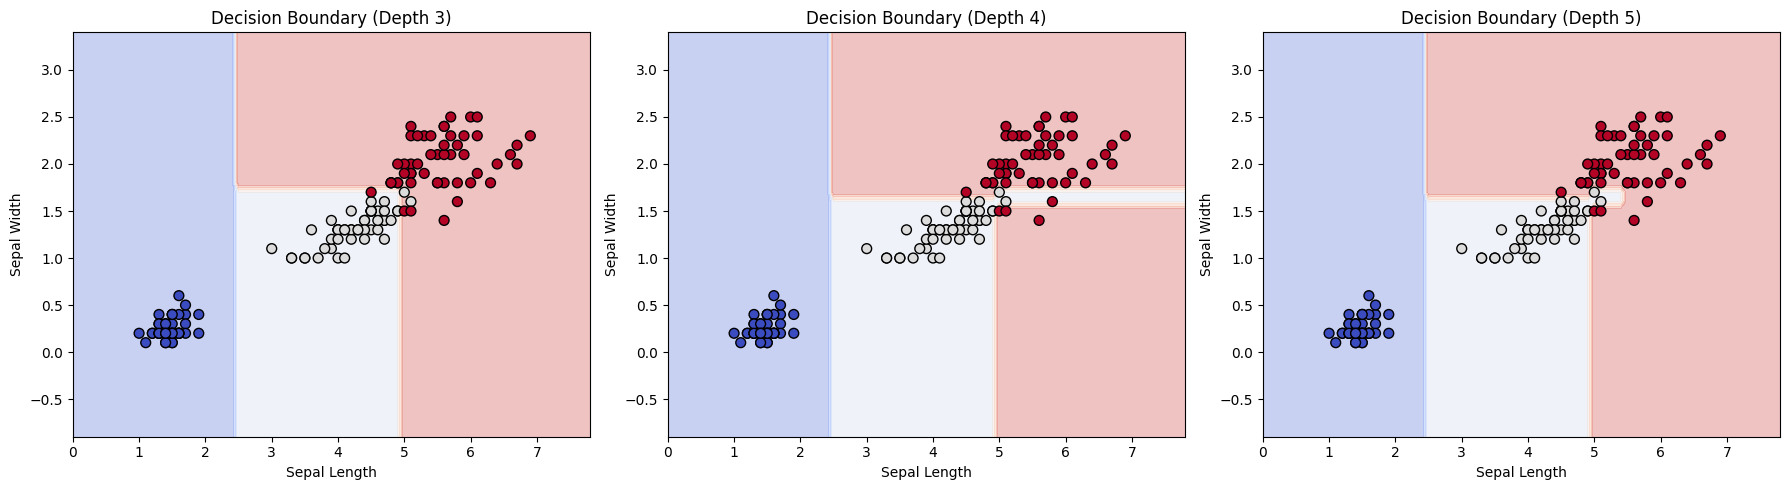

In [34]:
# Show  decision boundary graphs  for depths 3, 4, and 5
clf_depth3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf_depth4 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf_depth5 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

clf_depth3.fit(X, y)  # Train the classifiers
clf_depth4.fit(X, y)
clf_depth5.fit(X, y)

def plot_decision_boundary(clf, X, y, ax, title): # Define a function to plot the decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # Create a meshgrid of points to cover the feature space
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  # Predict the class for each point in the meshgrid
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm) # Plot the decision boundary
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=50, cmap=plt.cm.coolwarm)
    ax.set_title(title)
    ax.set_xlabel('Sepal Length')
    ax.set_ylabel('Sepal Width')

# Plot the decision boundaries for depths 3, 4, and 5
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_decision_boundary(clf_depth3, X, y, axes[0], 'Decision Boundary (Depth 3)')
plot_decision_boundary(clf_depth4, X, y, axes[1], 'Decision Boundary (Depth 4)')
plot_decision_boundary(clf_depth5, X, y, axes[2], 'Decision Boundary (Depth 5)')

plt.tight_layout()
plt.show()

In [35]:
# explain your conclusions on increasing the depth and increasing the number of folds.

#### 1. Increasing the Depth of the Decision Tree:

*   Shallow trees may underfit the data (large, general decision boundaries).
*   Deeper trees may overfit the data (small, intricate decision boundaries), leading to higher variance and reduced generalizability.


#### 2. Increasing the Number of Cross-Validation Folds:

*	Increasing the number of folds reduces bias in model evaluation, providing more reliable performance estimates, but at the cost of higher computational expense.
*	10-fold CV tends to give the best generalization with a lower bias but is computationally more expensive than 5-fold and 7-fold CV.
